# Santander Customer Satisfaction
![title](git.png)
### Introduction and Background

From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late. <br />
In this project, we work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

You are provided with an anonymized dataset containing a large number of numeric variables. The "TARGET" column is the variable to predict. It equals one for unsatisfied customers and 0 for satisfied customers. <br/>
The task is to predict the probability that each customer in the test set is an unsatisfied customer.

We implement a decision tree classifier model from the Scikit-learn library to predict the class. We will initially evaluate the default decision tree model and step by step explore differnent parameters of the decision tree classifier to improve the model. 


#### References: <br />
- [SckitLearn Library](https://scikit-learn.org/stable/index.html) <br />
- [Pandas Library : DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) <br />
- [Santender Dataset: Kaggle.com](https://www.kaggle.com/competitions/santander-customer-satisfaction)<br />
    - train.csv - the training set including the target <br/>
    - test.csv - the test set without the target <br/>
    - sample_submission.csv - a sample submission file in the correct format <br/>

#### Notebook Index: 
- [Data Import](#DataImport) <br />
- [Data Cleaning](#DataClean) <br />
- [Model Development](#ModelDev) <br />
    - [Base Model w/0 train_test_split validation](#notts) <br />
    - [Model 2 to 8 w/ train_test_split validation](#tts) <br />
    - [Variation in criterion parameter](#criterion) <br />
    - [Variation in max_depth parameter](#max_depth) <br />
    - [Variation in splitter parameter](#splitter)<br />
    - [Variation in leafnode parameter](#leafnode) <br />
- [Model Accuracy ](#accuracy) <br />
- [TreeMap Visualization](#Visualize) <br />
- [Prediction Export](#DataExport) <br />

#### Import Librarires <a id="Import"></a>
Import data manipulation and machine learning libraries

In [6]:
# Libraries
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

## Data Import <a id="DataImport"></a>
File are present in "data" folder

In [7]:
train_csv_filename=r'Data/Santander Customer Satisfaction - TRAIN.csv'
train_df=pd.read_csv(train_csv_filename)

test_csv_filename=r'Data/Santander Customer Satisfaction - TEST-Without TARGET.csv'
test_df=pd.read_csv(test_csv_filename)

print("Size of training data:",train_df.shape,"\nSize of testing data:",test_df.shape)

Size of training data: (76020, 371) 
Size of testing data: (75818, 370)


 View Train and Test datasets without any cleaning/alteration

In [8]:
train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [9]:
test_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


<font color="blue">
train_df contains the target column for validation of our model and training accuracy prediction <br>
The column headers are anonymous <br>
We cannot derive any usefule information from the column headers or perform feature selection 
</font>

## Data Cleaning <a id="DataClean"></a>
### Checking Row Duplicates

In [10]:
train_df.shape

(76020, 371)

In [11]:
train_df.drop_duplicates()
train_df.shape

(76020, 371)

<font color= 'blue '> 
No Row duplicates found
</font>

### Check for Null Values

In [12]:
train_df.isnull().sum().sort_values(ascending=False)

ID                         0
imp_trasp_var17_in_ult1    0
ind_var7_emit_ult1         0
imp_venta_var44_ult1       0
imp_venta_var44_hace3      0
                          ..
num_op_var40_hace3         0
num_op_var40_hace2         0
num_var25                  0
num_var25_0                0
TARGET                     0
Length: 371, dtype: int64

No null values in dataset

###  Descriptive statistics measures for Train dataset 

In [13]:
train_df.info(verbose=True)
print()
# test_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 371 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    ID                             int64  
 1    var3                           int64  
 2    var15                          int64  
 3    imp_ent_var16_ult1             float64
 4    imp_op_var39_comer_ult1        float64
 5    imp_op_var39_comer_ult3        float64
 6    imp_op_var40_comer_ult1        float64
 7    imp_op_var40_comer_ult3        float64
 8    imp_op_var40_efect_ult1        float64
 9    imp_op_var40_efect_ult3        float64
 10   imp_op_var40_ult1              float64
 11   imp_op_var41_comer_ult1        float64
 12   imp_op_var41_comer_ult3        float64
 13   imp_op_var41_efect_ult1        float64
 14   imp_op_var41_efect_ult3        float64
 15   imp_op_var41_ult1              float64
 16   imp_op_var39_efect_ult1        float64
 17   imp_op_var39_efect_ult3      

<font color='blue' >
No categorical data found in training dataset
</font>

In [14]:
## pd.set_option("display.max_columns",None)
train_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [15]:
# Understanding the balance of target in training dataset
x=train_df["TARGET"]
x.value_counts(normalize=True)*100

0    96.043147
1     3.956853
Name: TARGET, dtype: float64

<font color='blue'>
Imbalanced dataset with ~4% of unsatisfied target class
</font>

## Decision Tree Classification Model Development <a id="ModelDev"> </a>   
### Defining shape of Training data 
Using the Training DataFrame, we divide the set into target and input variables in-order to fit the data into the Classfier model

In [16]:
XTrain=train_df.drop(["TARGET"],axis=1).copy()
YTrain=train_df["TARGET"].copy()

### Model 1  <a id="notts"> </a>
Model : Decision Tree Classifier <br />
Parameters : Default 

In [17]:
#### Without using train_test_split
DecisionTreeModel_1=DecisionTreeClassifier()
DecisionTreeModel_1.fit(XTrain,YTrain)
Pred=DecisionTreeModel_1.predict(XTrain)

# Accuracy will be 1 as same data was used for training
print("Accuracy of the Default Decision Tree Model 1 :", metrics.accuracy_score(YTrain,Pred))
print("Depth of Model 1 : ",DecisionTreeModel_1.tree_.max_depth)

Accuracy of the Default Decision Tree Model 1 : 1.0
Depth of Model 1 :  58


### Model 2 <a id="tts"> </a>
Model : Decision Tree Classifier <br />
Parameters : Default 

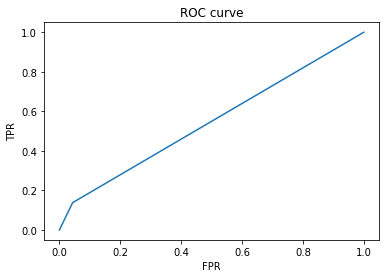

Accuracy of the Stock Decision Tree Model 2: 0.9229150223625362 
Max_Depth:  61 
ROC_AUC Score  0.547245954216238
CPU times: total: 5.73 s
Wall time: 5.8 s


In [18]:
%%time

#### Without using train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(XTrain,YTrain,test_size=0.2)

DecisionTreeModel_2=DecisionTreeClassifier()
DecisionTreeModel_2.fit(X_train,Y_train)
Pred_2=DecisionTreeModel_2.predict(X_test)

# ROC Curve
fpr_default, tpr_default, _ = metrics.roc_curve(Y_test,Pred_2)
plt.plot(fpr_default, tpr_default)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print("Accuracy of the Stock Decision Tree Model 2:", metrics.accuracy_score(Y_test,Pred_2),
      "\nMax_Depth: ",DecisionTreeModel_2.tree_.max_depth,
     "\nROC_AUC Score ",metrics.roc_auc_score(Y_test,DecisionTreeModel_2.predict_proba(X_test)[:,1]))

## Variation in criterion <a id="criterion"> </a>
### Model 3
Model : Decision Tree Classifier <br />
Parameters : Criterion - Entropy


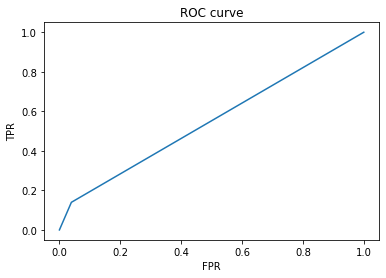

Accuracy of the Decision Tree Model 3: 0.927058668771376 
Max_Depth:  67 
 ROC_AUC Score  0.5501745768889635
CPU times: total: 4.19 s
Wall time: 4.17 s


In [19]:
%%time

DecisionTreeModel_3=DecisionTreeClassifier(criterion="entropy")

DecisionTreeModel_3.fit(X_train,Y_train)
Pred_3=DecisionTreeModel_3.predict(X_test)

# ROC Curve
fpr3, tpr3, _ = metrics.roc_curve(Y_test,DecisionTreeModel_3.predict_proba(X_test)[:,1])
plt.plot(fpr3, tpr3)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print("Accuracy of the Decision Tree Model 3:", metrics.accuracy_score(Y_test,Pred_3),
      "\nMax_Depth: ",DecisionTreeModel_3.tree_.max_depth,
     "\n ROC_AUC Score ",metrics.roc_auc_score(Y_test,DecisionTreeModel_3.predict_proba(X_test)[:,1]))

<font color="blue">
Model 3 has marginally improved with the usage of "entropy" as criterion instead of default "gini"
</font>

## Variation in max_depth
### Model 4 
Model : Decision Tree Classifier <br />
Parameters : max_depth - 10
<a id="max_depth"><a/>

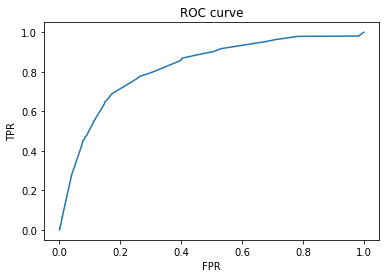

Accuracy of the Decision Tree Model 4: 0.9577084977637463 
Max_Depth:  10 
 ROC_AUC Score  0.8200910219471391
CPU times: total: 2.75 s
Wall time: 2.75 s


In [20]:
%%time

DecisionTreeModel_4=DecisionTreeClassifier(max_depth=10)

DecisionTreeModel_4.fit(X_train,Y_train)
Pred_4=DecisionTreeModel_4.predict(X_test)

# ROC Curve
fpr4, tpr4, _ = metrics.roc_curve(Y_test,DecisionTreeModel_4.predict_proba(X_test)[:,1])
plt.plot(fpr4, tpr4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print("Accuracy of the Decision Tree Model 4:", metrics.accuracy_score(Y_test,Pred_4),
      "\nMax_Depth: ",DecisionTreeModel_4.tree_.max_depth,
        "\n ROC_AUC Score ",metrics.roc_auc_score(Y_test,DecisionTreeModel_4.predict_proba(X_test)[:,1]))

<font color="blue">
Reduction in max_depth of tree results in increase in accuracy and ROC score
</font>

### Model 5 
Model : Decision Tree Classifier <br />
Parameters : max_depth - 20

In [21]:
# %%time

# DecisionTreeModel_5=DecisionTreeClassifier(max_depth=20)

# DecisionTreeModel_5.fit(X_train,Y_train)
# Pred_5=DecisionTreeModel_5.predict(X_test)
# print("Accuracy of the Decision Tree Model 5:", metrics.accuracy_score(Y_test,Pred_5),
#       "\nMax_Depth: ",DecisionTreeModel_5.tree_.max_depth,
#         "\n ROC_AUC Score ",metrics.roc_auc_score(Y_test,DecisionTreeModel_5.predict_proba(X_test)[:,1]))

# # ROC Curve
# fpr5, tpr5, _ = metrics.roc_curve(Y_test,DecisionTreeModel_5.predict_proba(X_test)[:,1])
# plt.plot(fpr5, tpr5)
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.title('ROC curve')
# plt.show()

<font color="blue">
Increase of max_depth is reducing accuracy
</font>

### Model 6 
Model : Decision Tree Classifier <br />
Parameters : max_depth - 4

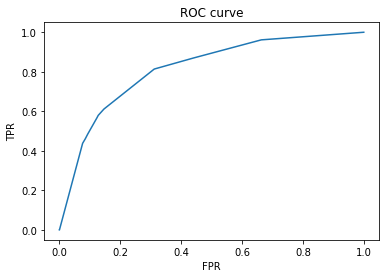

Accuracy of the Decision Tree Model 6: 0.9589581689029203 
Max_Depth:  4 
 ROC_AUC Score  0.8144604948302849
CPU times: total: 1.39 s
Wall time: 1.39 s


In [22]:
%%time

DecisionTreeModel_6=DecisionTreeClassifier(max_depth=4)

DecisionTreeModel_6.fit(X_train,Y_train)
Pred_6=DecisionTreeModel_6.predict(X_test)

# ROC Curve
fpr6, tpr6, _ = metrics.roc_curve(Y_test,DecisionTreeModel_6.predict_proba(X_test)[:,1])
plt.plot(fpr6, tpr6)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print("Accuracy of the Decision Tree Model 6:", metrics.accuracy_score(Y_test,Pred_6),
      "\nMax_Depth: ",DecisionTreeModel_6.tree_.max_depth,
        "\n ROC_AUC Score ",metrics.roc_auc_score(Y_test,DecisionTreeModel_6.predict_proba(X_test)[:,1]))

## Variation in splitter  
### Model 7 : Splitter Random
<a id="splitter"><a/>

In [23]:
%%time

DecisionTreeModel_7=DecisionTreeClassifier(splitter="random")

DecisionTreeModel_7.fit(X_train,Y_train)
Pred_7=DecisionTreeModel_7.predict(X_test)
print("Accuracy of the Decision Tree Model 7:", metrics.accuracy_score(Y_test,Pred_7),
     "\nMax_Depth: ",DecisionTreeModel_7.tree_.max_depth,
        "\n ROC_AUC Score ",metrics.roc_auc_score(Y_test,DecisionTreeModel_7.predict_proba(X_test)[:,1]))

# ROC Curve
# fpr7, tpr7, _ = metrics.roc_curve(Y_test,DecisionTreeModel_7.predict_proba(X_test)[:,1])
# plt.plot(fpr7, tpr7)
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.title('ROC curve')
# plt.show()


Accuracy of the Decision Tree Model 7: 0.9232438831886346 
Max_Depth:  63 
 ROC_AUC Score  0.5435760251335238
CPU times: total: 2.97 s
Wall time: 2.97 s


<font color="blue">
Not much significant change in accuracy when compared to default model
</font >

## Variation in max leaf node  
### Model 8 : Max Number of Leaf Nodes 
<a id="leafnode"><a/>

Accuracy of the Decision Tree Model 8: 0.9590239410681399 
Max_Depth:  6 
 ROC_AUC Score  0.8102406405662375


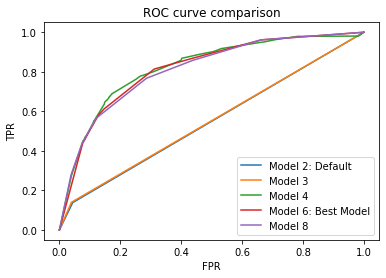

CPU times: total: 1.66 s
Wall time: 1.66 s


In [24]:
%%time

DecisionTreeModel_8=DecisionTreeClassifier(max_leaf_nodes=10)

DecisionTreeModel_8.fit(X_train,Y_train)
Pred_8=DecisionTreeModel_8.predict(X_test)
print("Accuracy of the Decision Tree Model 8:", metrics.accuracy_score(Y_test,Pred_8),
      "\nMax_Depth: ",DecisionTreeModel_8.tree_.max_depth,
        "\n ROC_AUC Score ",metrics.roc_auc_score(Y_test,DecisionTreeModel_8.predict_proba(X_test)[:,1]))

# ROC Curve
fpr8, tpr8, _ = metrics.roc_curve(Y_test,DecisionTreeModel_8.predict_proba(X_test)[:,1])
plt.plot(fpr_default, tpr_default,label="Model 2: Default")
plt.plot(fpr3, tpr3,label="Model 3")
plt.plot(fpr4, tpr4,label="Model 4")
# plt.plot(fpr5, tpr5,label="Model 5")
plt.plot(fpr6, tpr6,label="Model 6: Best Model")
plt.plot(fpr8, tpr8,label="Model 8")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve comparison')
plt.legend()
plt.show()
      

### Final Model

After comparing all models, we choose the model 6 having maximum area under the curve (Model 6). <br />

## Accuracy Measurement <a id="accuracy"><a/>

In [25]:
# Accuracy Metrics 
print("ROC_AUC Score ",metrics.roc_auc_score(Y_test,DecisionTreeModel_6.predict_proba(X_test)[:,1]))
print()
print("Accuracy of the Decision Tree Model 6:", metrics.accuracy_score(Y_test,Pred_6))
print()
print("Max_Depth: ",DecisionTreeModel_6.tree_.max_depth)
print()
print("Confustion Matrix: \n",metrics.confusion_matrix(Y_test,Pred_6))
print()
print("Classification Report: \n",metrics.classification_report(Y_test,Pred_6))

ROC_AUC Score  0.8144604948302849

Accuracy of the Decision Tree Model 6: 0.9589581689029203

Max_Depth:  4

Confustion Matrix: 
 [[14580     1]
 [  623     0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     14581
           1       0.00      0.00      0.00       623

    accuracy                           0.96     15204
   macro avg       0.48      0.50      0.49     15204
weighted avg       0.92      0.96      0.94     15204



## Visualize Decision Tree <a id="Visualize"><a/>

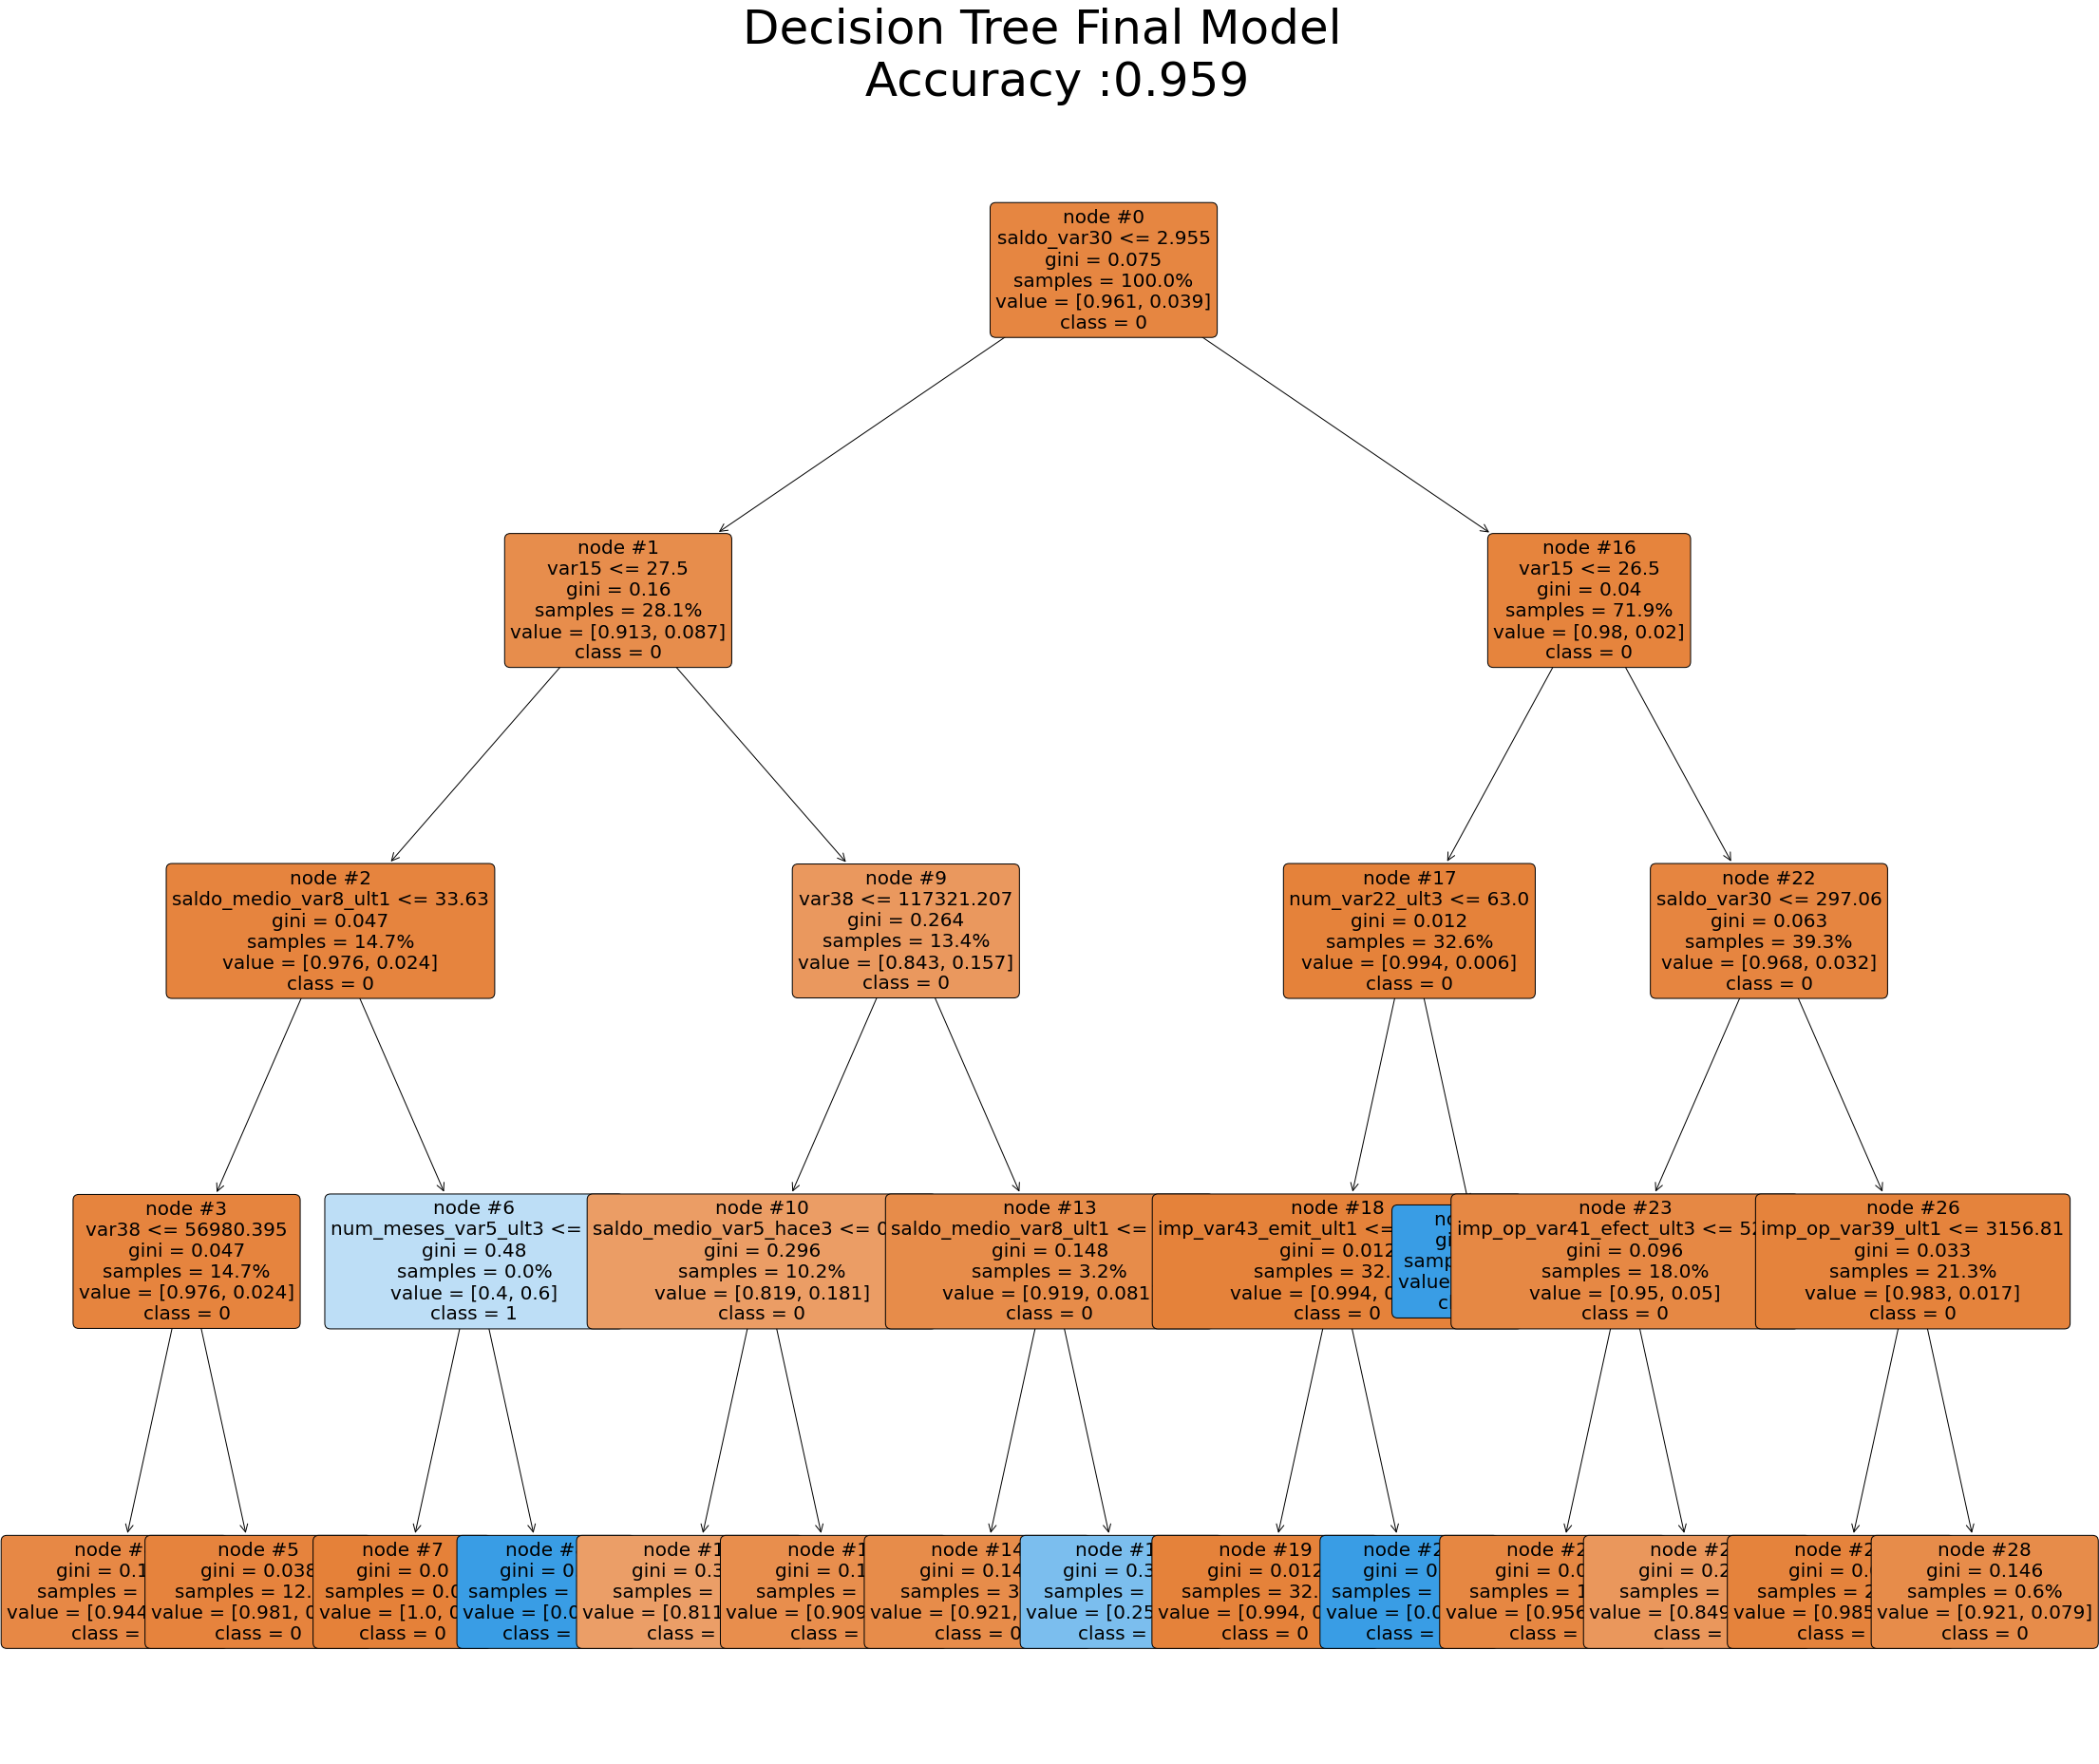

In [26]:
plt.figure(figsize=(38,32))# set plot size (denoted in inches)
tree.plot_tree(DecisionTreeModel_6,fontsize=20,
               node_ids=True,rounded=True,feature_names=train_df.columns,filled= True,proportion=True,
              class_names=["0","1"])

plt.title("Decision Tree Final Model \n Accuracy :"+str(round(metrics.accuracy_score(Y_test,Pred_6),3)),fontsize=50)
plt.show()

## Prediction Export for testData <a id="DataExport"><a/>

In [27]:
# Export Prediction for kaggle
prID=test_df["ID"]
prob = pd.DataFrame(DecisionTreeModel_6.predict_proba(test_df)[:,1],columns=["TARGET"])
    
pd.concat([prID,prob],axis=1).to_csv("Results.csv",index=False)
print("Data has been exported! ")

Data has been exported! 


### Things to note for this project
1. Column Headers do not provide valuable information
2. Training data largely contains Class 0 instances
3. Multiple input columns largely consist of value 0

The training data set provides very few instances of Customer Satisfaction Target of 0 (~ 4%). <br />
We must train our dataset with almost equal occurance of all distinct TARGET classes so that the Model can learn equally about the input parameters of both classes.

# Kaggle Score
![r](Kaggle_Screenshot.png)